# Model error plots 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

plt.style.use("bmh")

housing = fetch_california_housing()

X = pd.DataFrame(housing["data"], columns=housing["feature_names"])
y = pd.DataFrame(housing["target"], columns=housing["target_names"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [2]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

## Residual Plot

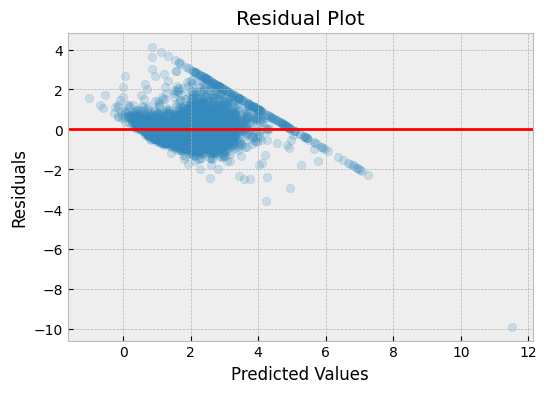

In [3]:
residuals = y_test - y_pred
fig, ax = plt.subplots(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color="r", linestyle="-")
plt.title("Residual Plot")
plt.show()

## Histogram of residuals 

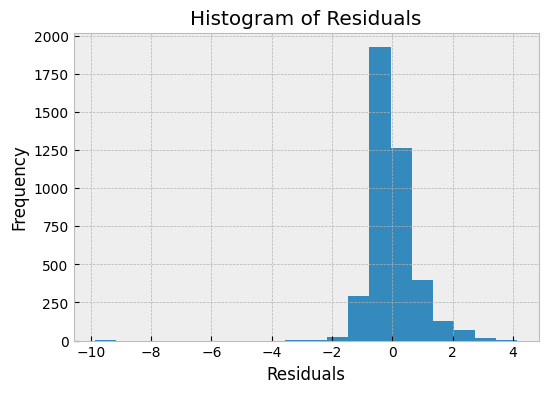

In [4]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

## Scale-location plot

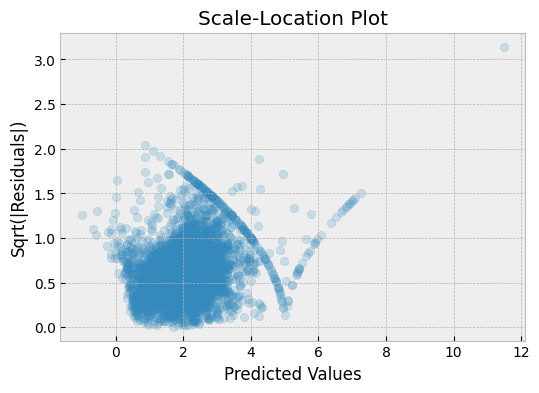

In [5]:
import numpy as np

# calculate the absolute square root of the residuals
sqrt_abs_resid = np.sqrt(np.abs(residuals))

fig, ax = plt.subplots(figsize=(6, 4))
# plot the square root of the absolute residuals against the predicted values
plt.scatter(y_pred, sqrt_abs_resid, alpha=0.2)
plt.title("Scale-Location Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Sqrt(|Residuals|)")
plt.show()

## Q-Q plot

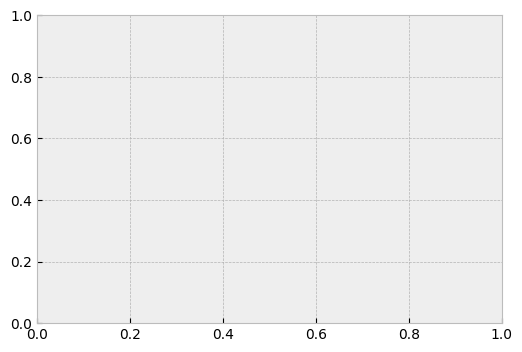

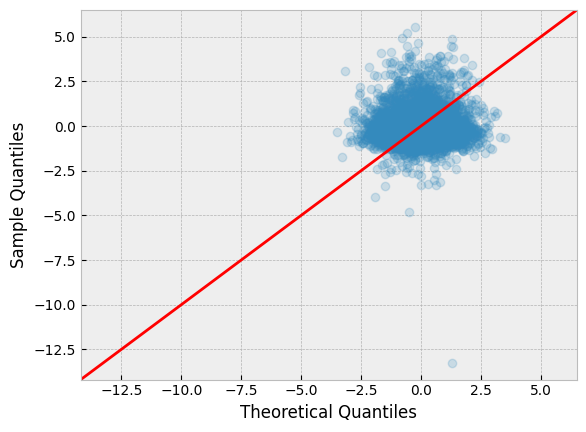

In [11]:
import statsmodels.api as sm

# create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(residuals, fit=True, line="45", alpha=0.2)
plt.show()

## Leverage plot

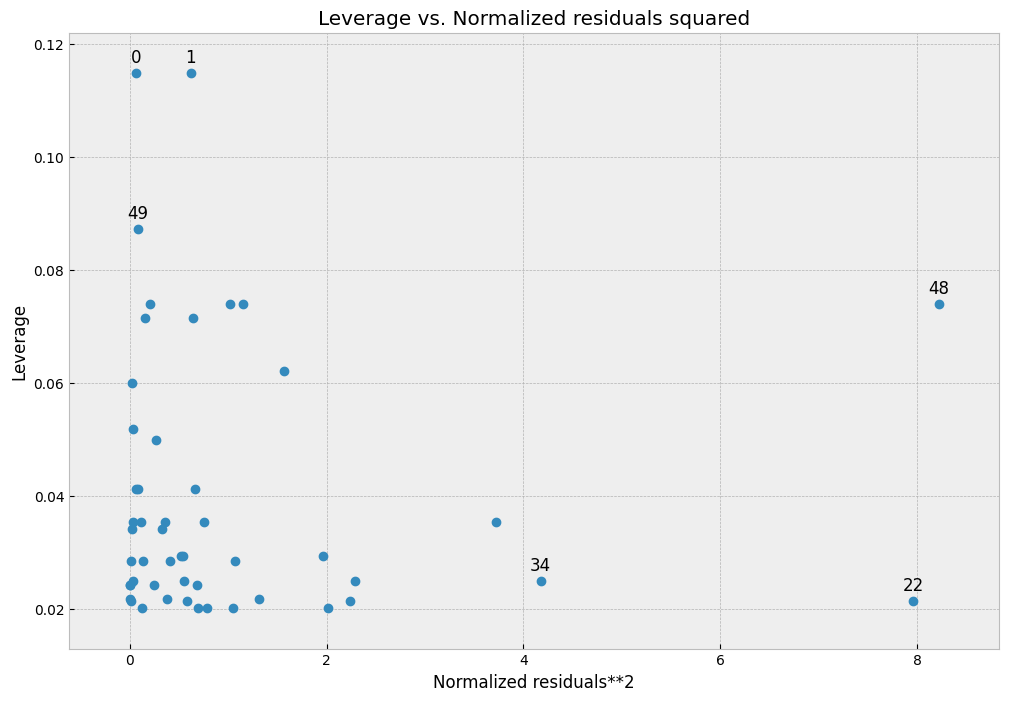

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_leverage_resid2

# Load example data
data = sm.datasets.get_rdataset("cars", "datasets").data

# Create X and y variables
X = data[["speed"]]
y = data["dist"]

# Fit the linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit()

# Plot leverage plot
fig, ax = plt.subplots(figsize=(12, 8))
plot_leverage_resid2(model, ax=ax)

plt.show()

## Cook's Plot

eval_env: 1


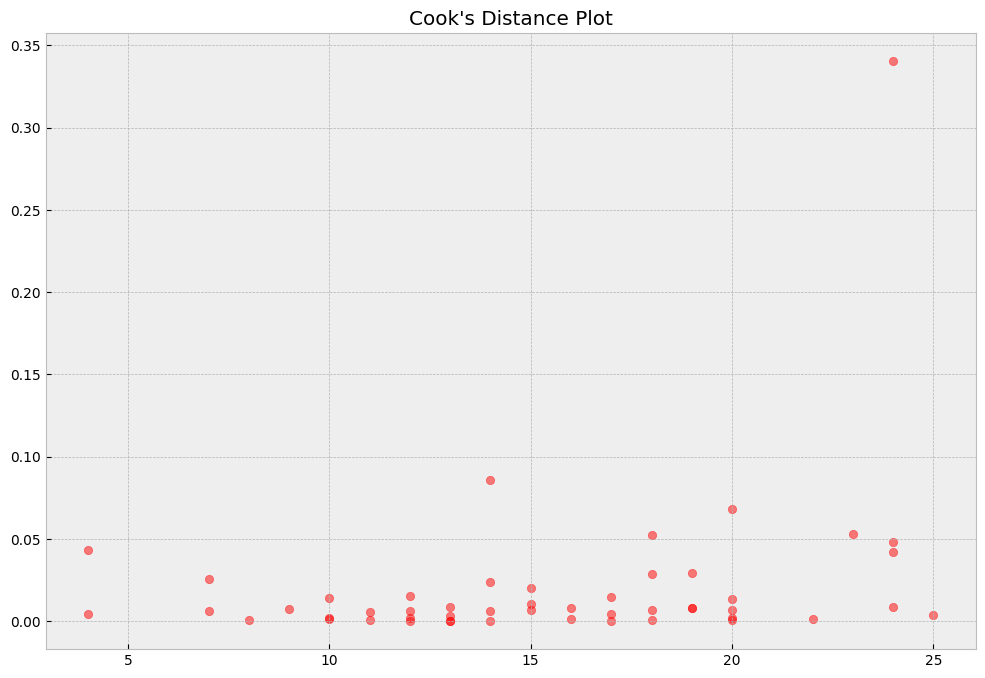

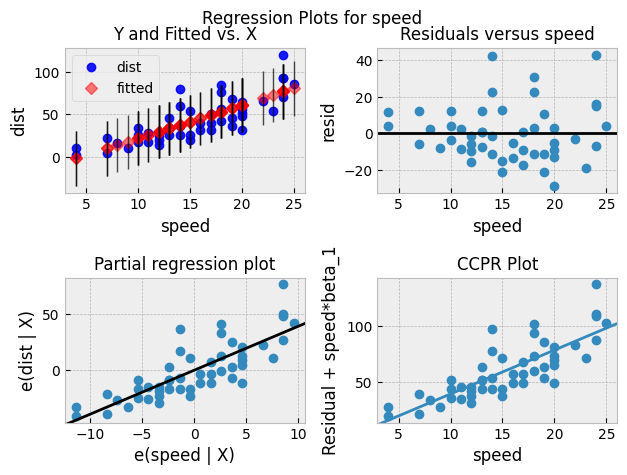

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_regress_exog

# Load example data
data = sm.datasets.get_rdataset("cars", "datasets").data

# Create X and y variables
X = data[["speed"]]
y = data["dist"]

# Fit the linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit()

# Create Cook's distance plot
fig, ax = plt.subplots(figsize=(12, 8))
plot_regress_exog(model, "speed")

influence = model.get_influence()
cooks_distance = influence.cooks_distance[0]
ax.scatter(X, cooks_distance, alpha=0.5, color="r")
ax.set_title("Cook's Distance Plot")
plt.show()

## Actual vs. predicted

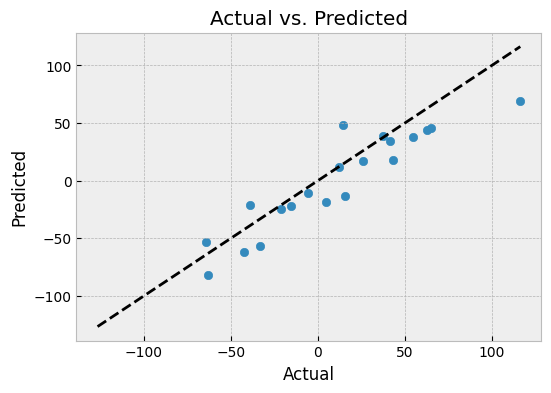

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit the linear regression model
model = LinearRegression().fit(X_train, y_train)

# Compute the predicted values for the test set
y_pred = model.predict(X_test)

# Plot the actual vs. predicted values
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=2)
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.set_title("Actual vs. Predicted")
plt.show()

## MAE

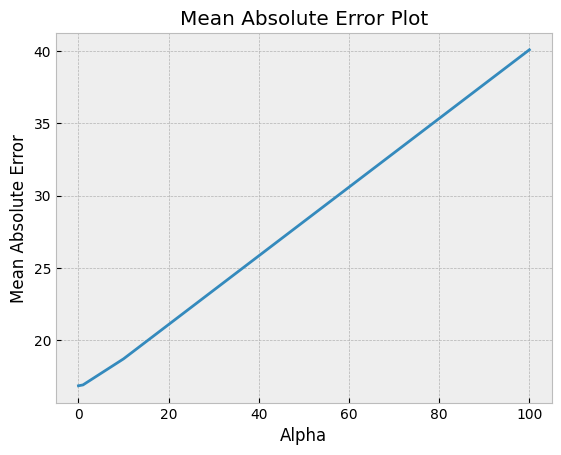

In [10]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Define a list of alpha values to test
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Calculate the MAE for each alpha value
mae_values = []
for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_values.append(mae)

# Plot the MAE values against the alpha values
plt.plot(alphas, mae_values)
plt.xlabel("Alpha")
plt.ylabel("Mean Absolute Error")
plt.title("Mean Absolute Error Plot")
plt.show()